In [40]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [41]:
train_dataset = MNIST(root = 'data/', download = True)

In [42]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [43]:
len(train_dataset)

60000

In [44]:
test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset)

10000

In [45]:
train_dataset[0]
#it is the image 28X28 represent the number 5

(<PIL.Image.Image image mode=L size=28x28>, 5)

label:  5


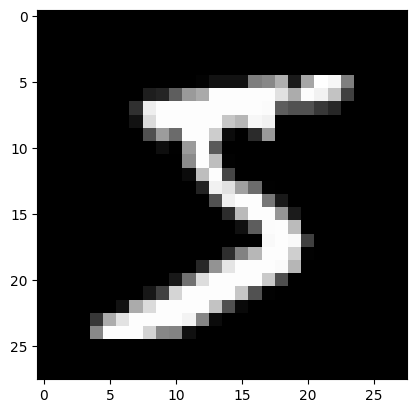

In [46]:
# visualizing the image

import matplotlib.pyplot as plt
image, label = train_dataset[0]
plt.imshow(image, cmap = 'gray')
print('label: ', label)

label:  3


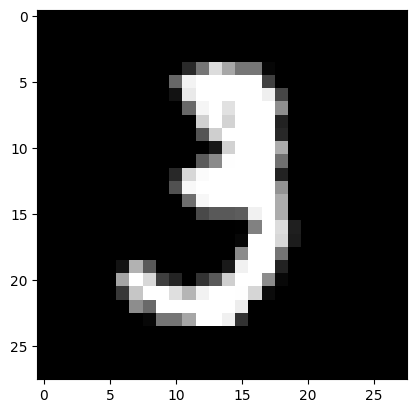

In [47]:
image, label = train_dataset[10]
plt.imshow(image, cmap = 'gray')
print('label: ', label)

**NOTE:**

Pytorch does not know how to work with thw images, so we will convert the images to tensoers

In [48]:
import torchvision.transforms as transforms

In [49]:
train_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor() )

In [50]:
image_tensor, label = train_dataset[0]
print(image_tensor.shape)

torch.Size([1, 28, 28])


In [51]:
print(image_tensor[:, 15:20, 15:20]) # we are seeing particular part of the image

tensor([[[0.7294, 0.9922, 0.9922, 0.5882, 0.1059],
         [0.0627, 0.3647, 0.9882, 0.9922, 0.7333],
         [0.0000, 0.0000, 0.9765, 0.9922, 0.9765],
         [0.5098, 0.7176, 0.9922, 0.9922, 0.8118],
         [0.9922, 0.9922, 0.9922, 0.9804, 0.7137]]])


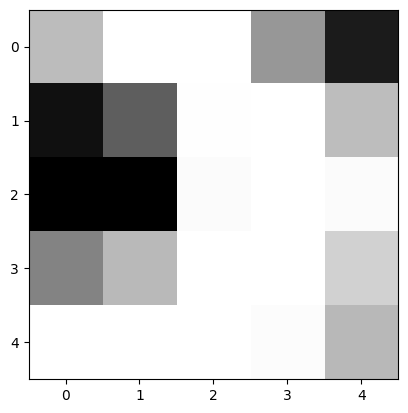

In [52]:
plt.imshow(image_tensor[0, 15:20, 15:20], cmap = 'gray')

# Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:
1. **Training set** used to train the model l.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In the MNIST dataset, there are 60,000 training images, and 10,000 test images. The test set is standardized so that different researchers can report the results of their models against the same set of images.
Since there's no predefined validation set, we must manually split the 60,000 Images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [53]:
from torch.utils.data import random_split, DataLoader

train_dataset, val_dataset =  random_split(train_dataset, [50000, 10000])

In [54]:
print(len(train_dataset))
print(len(val_dataset))


50000
10000


In [55]:
batch_size = 128
train_Loader = DataLoader(train_dataset, batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size, shuffle =True)

# Logestic Regression

Now that we have prepared our data loaders, we can define our model.





*  A logistic regression model is almost identical to a linear regression model i.e. there are weights and bias matrices, and the output is
obtained using simple matrix operations (pred = x @w.t() + b).

*  Just as we did with linear regression, we can use in. Linear to create the model instead of defining and initializing the matrices manually.

*  Since nn. Linear expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.


*  The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label (i.e. O to 9). The predicted label for an image is simply the one with the highest probability.

In [56]:
import torch.nn as nn

input_size = 28*28 # 784 as input
num_classes = 10

# Logestic Regression model
model = nn.Linear(input_size, num_classes)

In [57]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0188, -0.0064, -0.0135,  ..., -0.0164, -0.0201,  0.0090],
        [ 0.0285,  0.0294,  0.0023,  ...,  0.0270, -0.0184,  0.0304],
        [ 0.0194, -0.0018, -0.0092,  ..., -0.0053, -0.0132,  0.0276],
        ...,
        [ 0.0011, -0.0261, -0.0207,  ..., -0.0183,  0.0315,  0.0147],
        [ 0.0131, -0.0025,  0.0235,  ...,  0.0125, -0.0066, -0.0200],
        [-0.0350, -0.0296,  0.0089,  ..., -0.0282,  0.0138,  0.0292]],
       requires_grad=True)
Parameter containing:
tensor([-0.0164,  0.0095,  0.0142, -0.0287,  0.0119, -0.0331,  0.0055,  0.0175,
         0.0220, -0.0259], requires_grad=True)


**Model**

In [58]:
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes) # fully connected layer(784 X 10)

  def forward(self, xb):
    xb = xb.reshape(-1,input_size) #flatten the input tensor
    out = self.linear(xb)  # passing the flatten layer to input layer
    return out

In [59]:
model = MNISTModel()
for images, labels in train_Loader:
  print(labels)
  print(images.shape)
  output = model(images)
  break
print(output[:2])
print(output.shape)

tensor([0, 2, 9, 5, 4, 7, 8, 7, 6, 6, 9, 6, 8, 0, 8, 3, 2, 6, 3, 1, 0, 8, 7, 8,
        1, 8, 5, 6, 8, 4, 2, 0, 7, 9, 2, 4, 3, 9, 6, 8, 0, 8, 9, 8, 2, 8, 9, 4,
        7, 7, 1, 8, 2, 8, 4, 1, 0, 1, 5, 0, 2, 7, 1, 8, 6, 6, 9, 8, 3, 4, 8, 4,
        8, 8, 3, 6, 8, 5, 0, 8, 6, 6, 1, 8, 0, 9, 9, 2, 2, 1, 7, 6, 5, 7, 6, 7,
        2, 5, 4, 4, 9, 1, 6, 1, 7, 2, 4, 6, 6, 1, 9, 0, 6, 1, 4, 6, 6, 3, 8, 7,
        7, 0, 2, 1, 2, 0, 3, 0])
torch.Size([128, 1, 28, 28])
tensor([[-0.1924, -0.1324, -0.0488, -0.0295,  0.0145,  0.0145, -0.1900,  0.4336,
         -0.0065,  0.1030],
        [-0.3741, -0.1858,  0.2256,  0.0978, -0.0448,  0.0668,  0.0347,  0.1994,
          0.1324, -0.1051]], grad_fn=<SliceBackward0>)
torch.Size([128, 10])


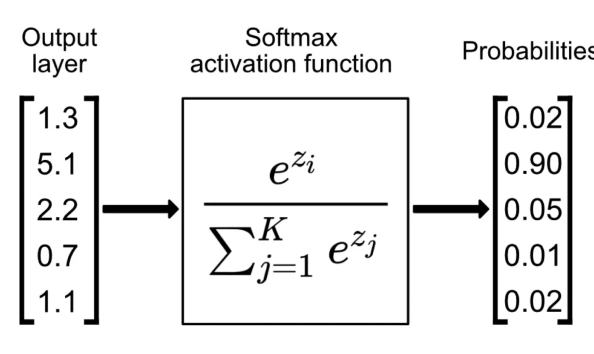

In [60]:
import torch.nn.functional as F

prob = F.softmax(output, dim = 1)
summ = torch.sum(prob[0])
print(summ)
print(prob[0])

tensor(1.0000, grad_fn=<SumBackward0>)
tensor([0.0815, 0.0865, 0.0941, 0.0959, 0.1002, 0.1002, 0.0817, 0.1524, 0.0981,
        0.1095], grad_fn=<SelectBackward0>)


In [61]:
max_prob, pred = torch.max(prob, dim = 1)
print(pred)
print(max_prob)

tensor([7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 2, 7, 7, 7, 7, 8, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 3, 7, 5,
        7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 9, 7, 3, 4, 7,
        7, 7, 7, 3, 7, 3, 7, 9, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 9, 2, 7, 7, 9, 7,
        7, 7, 7, 7, 7, 7, 7, 7])
tensor([0.1524, 0.1229, 0.1705, 0.1576, 0.1410, 0.1398, 0.1349, 0.1474, 0.1493,
        0.1827, 0.1346, 0.1661, 0.1579, 0.1871, 0.1421, 0.1244, 0.1733, 0.1848,
        0.1429, 0.1319, 0.1452, 0.1337, 0.1483, 0.1521, 0.1353, 0.1593, 0.1199,
        0.1593, 0.1463, 0.1500, 0.1952, 0.1579, 0.1141, 0.1287, 0.1469, 0.1439,
        0.1627, 0.1767, 0.1496, 0.1792, 0.1342, 0.1265, 0.1350, 0.1460, 0.1676,
        0.1468, 0.1655, 0.1274, 0.1753, 0.1128, 0.1347, 0.2034, 0.1609, 0.1795,
        0.1435, 0.1313, 0.1851, 0.1318, 0.1743, 0.1596, 0.1277, 0.1630, 0.1589,
       

**Evaluation Metric and Loss function**

In [62]:
def accuracy(output, target):
  max_values, pred = torch.max(output, dim = 1)
  return torch.tensor(torch.sum(pred == target).item()/ len(pred))

accracy = accuracy(output ,label)
print(accracy)

tensor(0.0156)


While the accuracy is a great way for us (humans) to evaluate the model, it can't be used as a loss function for optimizing our model using gradient descent, for the following reasons:

1. It's not a differentiable function. torch.max and are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.


Due to these reasons, accuracy is a great evaluation metric for classification, but not a good loss function. A commonly used loss function for classification problems is the cross entropy, which has the following formula:

In [63]:
loss_fn = F.cross_entropy

loss = loss_fn(output, labels)
print(loss)

tensor(2.3539, grad_fn=<NllLossBackward0>)


# Training

for epoch in range(num_epochs):
*  Training phase

    for batch in train_loader:
    *  Generate predictions
    *  Calculate loss
    *  Compute gradients
    *  Update weights
    *  Reset gradients
*  Validation phase

    for batch in val_loader:
    *  Generate predictions
    *  Calculate loss
    *  alculate metrics (accuracy etc.)

*  Calculate average validation loss & metrics

*  Log epoch, loss & metrics for inspection

In [69]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes) # logestic model (784 X 10)

  def forwardpass(self, xb): #xb input image batch
    # Reshape input image batch
    xb = xb.reshape(-1, input_size)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    image, label = batch
    out = self.forwardpass(image)
    loss = F.cross_entropy(out, label)
    return loss

  def validation_step(self, batch):
    image, label = batch
    out = self.forwardpass(image)
    loss = F.cross_entropy(out, label)
    acc = accuracy(out, label)
    return {'Validation Loss':loss, 'Validation accuracy': acc}

  def validation_epoch_end(self, output):
    batch_loss = [x['Validation Loss'] for x in output]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [x['Validation accuracy'] for x in output]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'Validation_loss':epoch_loss.item(), 'Validation Accuracy':epoch_acc.item()}

  def epoch_end (self, epoch, result):
    print(f"Epoch: {epoch}, Val_Loss: {result['Validation_loss']:.4f}, Val_Accuracy: {result['Validation Accuracy']:.4f}")

model = MnistModel()


In [70]:
def evaluate(model, val_Loader):
  output = [model.validation_step(batch) for batch in val_Loader]
  return model.validation_epoch_end(output)

def fit(epoch, lr, model, train_Loader, val_Loader, optimizer= torch.optim.SGD):
  history = []
  optimizer = optimizer(model.parameters(), lr)
  for epoch in range(epoch):
    # Training Phase
    for batch in train_Loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    # Validation Phase
    result = evaluate(model, val_Loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history


In [71]:
history0 = evaluate(model, val_loader)
history0

{'Validation_loss': 2.3341927528381348,
 'Validation Accuracy': 0.08376186341047287}

In [73]:
history1 = fit(10, 0.001, model, train_Loader, val_loader)

Epoch: 0, Val_Loss: 1.1211, Val_Accuracy: 0.7993
Epoch: 1, Val_Loss: 1.0482, Val_Accuracy: 0.8061
Epoch: 2, Val_Loss: 0.9878, Val_Accuracy: 0.8115
Epoch: 3, Val_Loss: 0.9385, Val_Accuracy: 0.8169
Epoch: 4, Val_Loss: 0.8927, Val_Accuracy: 0.8213
Epoch: 5, Val_Loss: 0.8596, Val_Accuracy: 0.8248
Epoch: 6, Val_Loss: 0.8268, Val_Accuracy: 0.8287
Epoch: 7, Val_Loss: 0.8029, Val_Accuracy: 0.8301
Epoch: 8, Val_Loss: 0.7748, Val_Accuracy: 0.8360
Epoch: 9, Val_Loss: 0.7536, Val_Accuracy: 0.8388
